In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.optim as optim
import scipy
import seaborn as sns
from datetime import datetime, timedelta

from tqdm import tqdm

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import preprocessing as pp

from rnn import RNN
from lstm import LSTM

In [2]:
raw_data = pd.read_csv('consumption_and_temperatures.csv')
raw_data

,timestamp,NO1_consumption,NO1_temperature,NO2_consumption,NO2_temperature,NO3_consumption,NO3_temperature,NO4_consumption,NO4_temperature,NO5_consumption,NO5_temperature
0,2017-05-01 00:00:00+00:00,3325.431995,2.1,3534.588000,5.0,2674.838000,5.5,2061.209000,0.2,1609.089000,3.9
1,2017-05-01 01:00:00+00:00,3344.690998,1.8,3560.209000,4.1,2678.188000,4.0,2045.436000,0.1,1623.485000,3.2
2,2017-05-01 02:00:00+00:00,3398.359002,3.2,3596.149000,3.1,2678.341000,3.7,2020.007000,0.1,1634.128000,2.7
3,2017-05-01 03:00:00+00:00,3430.220001,3.6,3594.042000,2.3,2684.172000,3.2,2021.920000,0.1,1647.906000,2.3
4,2017-05-01 04:00:00+00:00,3606.750000,3.4,3665.091000,2.6,2733.345000,2.7,2045.913000,0.1,1679.176000,2.3
...,...,...,...,...,...,...,...,...,...,...,...
58459,2023-12-31 19:00:00+00:00,5608.067736,-4.7,4962.057148,4.1,3837.204332,-3.7,2806.182692,-6.5,2224.449164,6.3
58460,2023-12-31 20:00:00+00:00,5469.722792,-4.6,4864.162484,4.7,3773.021260,-3.6,2764.928700,-6.4,2175.957992,6.3
58461,2023-12-31 21:00:00+00:00,5321.221040,-4.5,4793.361440,4.6,3725.022064,-4.2,2738.213476,-6.4,2137.724404,6.2
58462,2023-12-31 22:00:00+00:00,5222.770756,-4.5,4742.807424,4.6,3668.956000,-4.2,2699.056760,-6.5,2110.928436,5.7


### Change timestamp to datetime formate

In [5]:
raw_data['timestamp'] = pd.to_datetime(raw_data['timestamp'])

In [7]:
data_timestamp_modified = raw_data.copy()
data_timestamp_modified['timestamp'] = pd.to_datetime(data_timestamp_modified['timestamp']).astype(int) // (3600 * 10 ** 9) - 414888

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_timestamp_modified)
scaled_data.shape

(58464, 11)

In [ ]:
data_seasons = pp.add_season_columns(raw_data)

In [ ]:
data_seasons_hours = pp.add_hour_columns(data_seasons)

## Feed-forward model

In [19]:
from feed_forward_network import *

In [21]:
raw_data['timestamp'] = pd.to_datetime(raw_data['timestamp']).astype(int) // (3600 * 10 ** 9) - 414888

In [22]:
type(raw_data['timestamp'][2])

numpy.int64

In [23]:
raw_data

,timestamp,NO1_consumption,NO1_temperature,NO2_consumption,NO2_temperature,NO3_consumption,NO3_temperature,NO4_consumption,NO4_temperature,NO5_consumption,NO5_temperature,season
0,0,3325.431995,2.1,3534.588000,5.0,2674.838000,5.5,2061.209000,0.2,1609.089000,3.9,spring
1,1,3344.690998,1.8,3560.209000,4.1,2678.188000,4.0,2045.436000,0.1,1623.485000,3.2,spring
2,2,3398.359002,3.2,3596.149000,3.1,2678.341000,3.7,2020.007000,0.1,1634.128000,2.7,spring
3,3,3430.220001,3.6,3594.042000,2.3,2684.172000,3.2,2021.920000,0.1,1647.906000,2.3,spring
4,4,3606.750000,3.4,3665.091000,2.6,2733.345000,2.7,2045.913000,0.1,1679.176000,2.3,spring
...,...,...,...,...,...,...,...,...,...,...,...,...
58459,58459,5608.067736,-4.7,4962.057148,4.1,3837.204332,-3.7,2806.182692,-6.5,2224.449164,6.3,winter
58460,58460,5469.722792,-4.6,4864.162484,4.7,3773.021260,-3.6,2764.928700,-6.4,2175.957992,6.3,winter
58461,58461,5321.221040,-4.5,4793.361440,4.6,3725.022064,-4.2,2738.213476,-6.4,2137.724404,6.2,winter
58462,58462,5222.770756,-4.5,4742.807424,4.6,3668.956000,-4.2,2699.056760,-6.5,2110.928436,5.7,winter


Note: No time data missing

In [24]:
data_shifted = raw_data.copy()
data_shifted['NO1_temperature_t-1'] = data_shifted['NO1_temperature'].shift(1)

In [25]:
data_shifted

,timestamp,NO1_consumption,NO1_temperature,NO2_consumption,NO2_temperature,NO3_consumption,NO3_temperature,NO4_consumption,NO4_temperature,NO5_consumption,NO5_temperature,season,NO1_temperature_t-1
0,0,3325.431995,2.1,3534.588000,5.0,2674.838000,5.5,2061.209000,0.2,1609.089000,3.9,spring,NaN
1,1,3344.690998,1.8,3560.209000,4.1,2678.188000,4.0,2045.436000,0.1,1623.485000,3.2,spring,2.1
2,2,3398.359002,3.2,3596.149000,3.1,2678.341000,3.7,2020.007000,0.1,1634.128000,2.7,spring,1.8
3,3,3430.220001,3.6,3594.042000,2.3,2684.172000,3.2,2021.920000,0.1,1647.906000,2.3,spring,3.2
4,4,3606.750000,3.4,3665.091000,2.6,2733.345000,2.7,2045.913000,0.1,1679.176000,2.3,spring,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58459,58459,5608.067736,-4.7,4962.057148,4.1,3837.204332,-3.7,2806.182692,-6.5,2224.449164,6.3,winter,-4.7
58460,58460,5469.722792,-4.6,4864.162484,4.7,3773.021260,-3.6,2764.928700,-6.4,2175.957992,6.3,winter,-4.7
58461,58461,5321.221040,-4.5,4793.361440,4.6,3725.022064,-4.2,2738.213476,-6.4,2137.724404,6.2,winter,-4.6
58462,58462,5222.770756,-4.5,4742.807424,4.6,3668.956000,-4.2,2699.056760,-6.5,2110.928436,5.7,winter,-4.5


In [26]:
data_seasons_NO1 = data_seasons[['timestamp', 'NO1_temperature', 'season_spring', 'season_summer', 'season_fall', 'season_winter', 'NO1_consumption']]
data_seasons_NO1

,timestamp,NO1_temperature,season_spring,season_summer,season_fall,season_winter,NO1_consumption
0,2017-05-01 00:00:00+00:00,2.1,True,False,False,False,3325.431995
1,2017-05-01 01:00:00+00:00,1.8,True,False,False,False,3344.690998
2,2017-05-01 02:00:00+00:00,3.2,True,False,False,False,3398.359002
3,2017-05-01 03:00:00+00:00,3.6,True,False,False,False,3430.220001
4,2017-05-01 04:00:00+00:00,3.4,True,False,False,False,3606.750000
...,...,...,...,...,...,...,...
58459,2023-12-31 19:00:00+00:00,-4.7,False,False,False,True,5608.067736
58460,2023-12-31 20:00:00+00:00,-4.6,False,False,False,True,5469.722792
58461,2023-12-31 21:00:00+00:00,-4.5,False,False,False,True,5321.221040
58462,2023-12-31 22:00:00+00:00,-4.5,False,False,False,True,5222.770756


In [27]:
scaler_seasons_NO1 = StandardScaler()

columns_to_scale_season_NO1 = ['NO1_temperature', 'NO1_consumption']
data_seasons_NO1[columns_to_scale_season_NO1] = scaler_seasons_NO1.fit_transform(data_seasons_NO1[columns_to_scale_season_NO1])
data_seasons_NO1

/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_17829/1061277147.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_seasons_NO1[columns_to_scale_season_NO1] = scaler_seasons_NO1.fit_transform(data_seasons_NO1[columns_to_scale_season_NO1])


,timestamp,NO1_temperature,season_spring,season_summer,season_fall,season_winter,NO1_consumption
0,2017-05-01 00:00:00+00:00,-0.644266,True,False,False,False,-0.490278
1,2017-05-01 01:00:00+00:00,-0.680446,True,False,False,False,-0.475559
2,2017-05-01 02:00:00+00:00,-0.511608,True,False,False,False,-0.434544
3,2017-05-01 03:00:00+00:00,-0.463369,True,False,False,False,-0.410195
4,2017-05-01 04:00:00+00:00,-0.487489,True,False,False,False,-0.275284
...,...,...,...,...,...,...,...
58459,2023-12-31 19:00:00+00:00,-1.464334,False,False,False,True,1.254197
58460,2023-12-31 20:00:00+00:00,-1.452275,False,False,False,True,1.148469
58461,2023-12-31 21:00:00+00:00,-1.440215,False,False,False,True,1.034979
58462,2023-12-31 22:00:00+00:00,-1.440215,False,False,False,True,0.959739


In [28]:
data_seasons_NO1_no_timestamp = data_seasons_NO1.drop(columns=['timestamp'])
data_seasons_NO1_no_timestamp = data_seasons_NO1_no_timestamp.replace(True, 1)
data_seasons_NO1_no_timestamp = data_seasons_NO1_no_timestamp.replace(False, 0)
data_seasons_NO1_no_timestamp

,NO1_temperature,season_spring,season_summer,season_fall,season_winter,NO1_consumption
0,-0.644266,1,0,0,0,-0.490278
1,-0.680446,1,0,0,0,-0.475559
2,-0.511608,1,0,0,0,-0.434544
3,-0.463369,1,0,0,0,-0.410195
4,-0.487489,1,0,0,0,-0.275284
...,...,...,...,...,...,...
58459,-1.464334,0,0,0,1,1.254197
58460,-1.452275,0,0,0,1,1.148469
58461,-1.440215,0,0,0,1,1.034979
58462,-1.440215,0,0,0,1,0.959739


In [29]:
df_X_train_NO1 = data_seasons_NO1_no_timestamp.drop(columns=['NO1_consumption'])
df_y_train_NO1 = data_seasons_NO1_no_timestamp.drop(columns=[ c for c in data_seasons_NO1_no_timestamp.columns if c not in ['NO1_consumption']])
df_X_train_NO1

,NO1_temperature,season_spring,season_summer,season_fall,season_winter
0,-0.644266,1,0,0,0
1,-0.680446,1,0,0,0
2,-0.511608,1,0,0,0
3,-0.463369,1,0,0,0
4,-0.487489,1,0,0,0
...,...,...,...,...,...
58459,-1.464334,0,0,0,1
58460,-1.452275,0,0,0,1
58461,-1.440215,0,0,0,1
58462,-1.440215,0,0,0,1


In [30]:
df_y_train_NO1

,NO1_consumption
0,-0.490278
1,-0.475559
2,-0.434544
3,-0.410195
4,-0.275284
...,...
58459,1.254197
58460,1.148469
58461,1.034979
58462,0.959739


In [31]:
X_NO1 = torch.tensor(df_X_train_NO1[df_X_train_NO1.columns].values, dtype=torch.float32)
y_NO1 = torch.tensor(df_y_train_NO1[df_y_train_NO1.columns].values, dtype=torch.float32)

In [111]:
X_train_NO1 = X_NO1 # [:len(X_NO1) // 2]
y_train_NO1 = y_NO1 # [:len(y_NO1) // 2]

In [113]:
ffn = FeedForwardNetwork(input_size=X_train_NO1.shape[1])

In [114]:
lr = 0.01
epochs = 100

In [115]:
loss_func = nn.MSELoss()
optimizer = optim.Adam(ffn.parameters(), lr=0.01)

In [130]:

def fit(x_train, y_train, model, loss_func, optimizer, epochs=10):
    losses = []
    for epoch in tqdm(range(epochs)):
        pred = model(x_train)
        loss = loss_func(pred, y_train)
        losses.append(loss.detach().numpy())
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    return losses

In [117]:
# X_train = torch.from_numpy(X_train_NO1)
# X_train[0, 0], X_train[0, 1]
# y_train = torch.from_numpy(y_train_NO1.reshape(-1))

In [118]:
X_train = X_train_NO1
y_train = y_train_NO1

In [131]:
# ffn.to(torch.float64)
losses = fit(X_train, y_train, ffn, loss_func, optimizer, epochs=100)

100%|██████████| 100/100 [00:00<00:00, 257.61it/s]


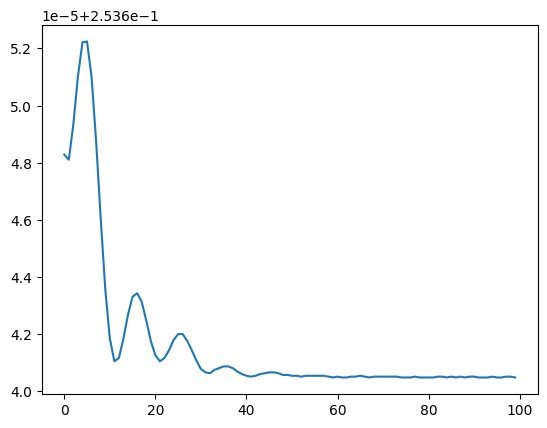

In [132]:
# losses[0]
plt.plot(losses)

In [133]:
X_train.shape

torch.Size([58464, 5])

In [134]:
# X_train[:, 1].sum(), X_train[:, 2].sum(), X_train[:, 3].sum(), X_train[:, 4].sum()

In [135]:
y_NO1.shape

torch.Size([58464, 1])

In [165]:
X_test = X_NO1[len(scaled_data) // 2:6 * len(scaled_data) // 10]
y_test = y_NO1[len(scaled_data) // 2:6 * len(scaled_data) // 10]
# X_test = torch.from_numpy(X_test_NO1)
# y_test = torch.from_numpy(y_test_NO1.reshape(-1))

pred_test = ffn(X_test)

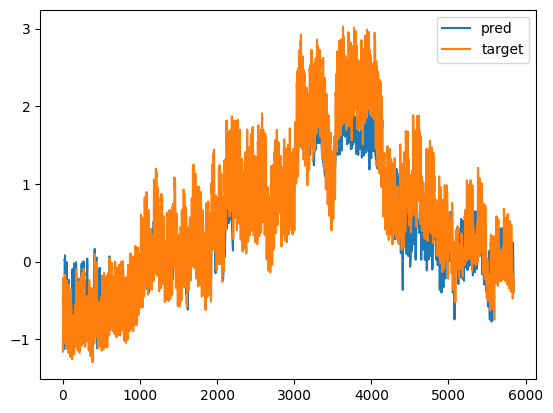

In [166]:
plt.plot(pred_test.detach().numpy(), label='pred')
plt.plot(y_test.detach().numpy(), label='target')
plt.legend()

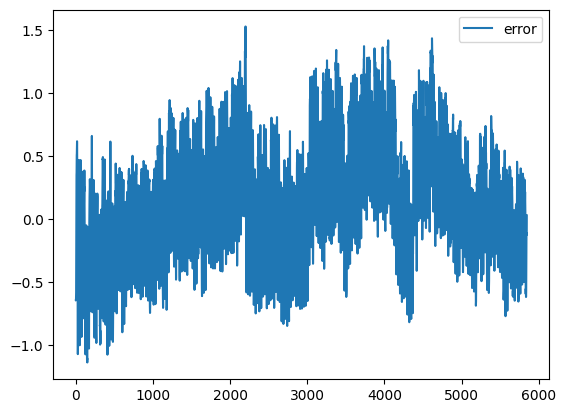

In [167]:
plt.plot(y_test.detach().numpy() - pred_test.detach().numpy(), label='error')
plt.legend()

In [168]:
seq_dim = 72

In [169]:
len_pred = 24 + 100

In [204]:
data_seasons[43776:]

,timestamp,NO1_consumption,NO1_temperature,NO2_consumption,NO2_temperature,NO3_consumption,NO3_temperature,NO4_consumption,NO4_temperature,NO5_consumption,NO5_temperature,season_fall,season_spring,season_summer,season_winter
43776,2022-04-29 00:00:00+00:00,3013.492067,6.4,3615.296941,5.7,3105.267791,0.5,2271.111525,-3.8,1582.885382,6.9,False,True,False,False
43777,2022-04-29 01:00:00+00:00,3019.167135,5.5,3618.892866,5.0,3107.300761,0.6,2300.348632,-3.3,1557.749586,6.6,False,True,False,False
43778,2022-04-29 02:00:00+00:00,3066.283324,5.0,3653.847960,3.3,3115.326680,1.3,2298.961351,-3.7,1561.116235,6.6,False,True,False,False
43779,2022-04-29 03:00:00+00:00,3167.085943,4.8,3743.718010,2.8,3084.318628,1.3,2294.753633,-3.8,1582.091229,6.6,False,True,False,False
43780,2022-04-29 04:00:00+00:00,3531.231895,4.8,3984.479089,2.3,3227.162118,1.8,2379.613315,-3.0,1664.296855,6.2,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58459,2023-12-31 19:00:00+00:00,5608.067736,-4.7,4962.057148,4.1,3837.204332,-3.7,2806.182692,-6.5,2224.449164,6.3,False,False,False,True
58460,2023-12-31 20:00:00+00:00,5469.722792,-4.6,4864.162484,4.7,3773.021260,-3.6,2764.928700,-6.4,2175.957992,6.3,False,False,False,True
58461,2023-12-31 21:00:00+00:00,5321.221040,-4.5,4793.361440,4.6,3725.022064,-4.2,2738.213476,-6.4,2137.724404,6.2,False,False,False,True
58462,2023-12-31 22:00:00+00:00,5222.770756,-4.5,4742.807424,4.6,3668.956000,-4.2,2699.056760,-6.5,2110.928436,5.7,False,False,False,True


In [170]:
start = 3 * len(scaled_data) // 4 - seq_dim
end = 3 * len(scaled_data) // 4 + len_pred - 1
X_test = X_NO1[start:end]
y_test = y_NO1[start:end]

pred_test = ffn(X_test)

In [203]:
start, end

(43776, 43971)

In [171]:
from copy import copy
target = copy(y_test)

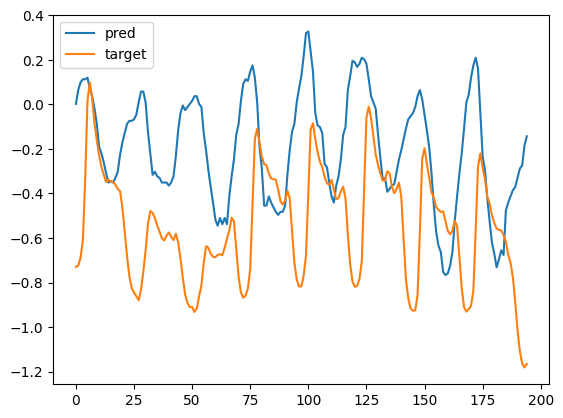

In [172]:
plt.plot(pred_test.detach().numpy(), label='pred')
plt.plot(y_test.detach().numpy(), label='target')
plt.legend()

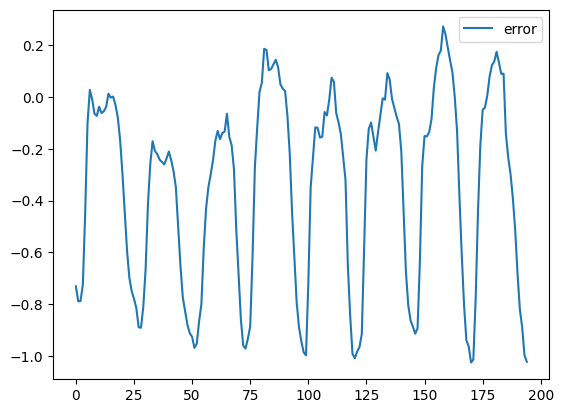

In [173]:
plt.plot(y_test.detach().numpy() - pred_test.detach().numpy(), label='error')
plt.legend()

In [174]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([58464, 5]),
 torch.Size([58464, 1]),
 torch.Size([195, 5]),
 torch.Size([195, 1]))

In [175]:
# X_train.stride()

In [176]:
from torch.nn.utils.rnn import pad_sequence

def make_sequences(x, y, seq_len=9, dt = 1):
    num_samples = x.shape[0]

    num_sequences = num_samples - seq_len + 1

    sequences = []
    targets = []

    for i in range(num_sequences):
        seq = x[i:i+seq_len]
        target = y[i+dt:i+seq_len+dt]
        sequences.append(seq)
        targets.append(target)

    sequences_padded = pad_sequence(sequences, batch_first=True)
    targets_padded = pad_sequence(targets, batch_first=True)

    sequences_tensor = torch.tensor(sequences_padded, dtype=torch.float32)
    targets_tensor = torch.tensor(targets_padded, dtype=torch.float32)
    return sequences_tensor, targets_tensor

In [177]:
# sequences_tensor.shape

In [178]:
X_train = X_train_NO1
y_train = y_train_NO1
X_test = X_NO1[start:end]
y_test = y_NO1[start:end]

In [179]:
X_train_seq, y_train_seq = make_sequences(X_train, y_train, seq_len=seq_dim)
X_test_seq, y_test_seq = make_sequences(X_test, y_test, seq_len=seq_dim)

/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_17829/2951650516.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sequences_tensor = torch.tensor(sequences_padded, dtype=torch.float32)
/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_17829/2951650516.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets_tensor = torch.tensor(targets_padded, dtype=torch.float32)


In [180]:
X_train, y_train = X_train_seq, y_train_seq 
X_test, y_test = X_test_seq, y_test_seq 

In [181]:
y_test.shape

torch.Size([124, 72, 1])

In [182]:
target.shape

torch.Size([195, 1])

In [62]:
seq_dim

72

### RNN Model

In [63]:
X_train.shape

torch.Size([29161, 72, 5])

In [64]:
X_train.shape

torch.Size([29161, 72, 5])

In [ ]:
y_test.shape

torch.Size([25, 1, 1])

In [ ]:
X_test.shape

torch.Size([25, 72, 5])

In [ ]:
y_test.shape

torch.Size([25, 1, 1])

In [ ]:
df_y_train_NO1.describe()

,NO1_consumption
count,5.846400e+04
mean,-7.194877e-16
std,1.000009e+00
min,-1.740096e+00
25%,-8.225973e-01
50%,-1.751131e-01
75%,7.683627e-01
max,3.027689e+00


In [67]:
import torch
import torch.nn as nn

class LSTM(nn.Module):

    def __init__(self, input_size = 1, hidden_size = 1, num_layers = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, 1)
        # self.ffn = nn.Sequential(
        #     nn.Linear(hidden_size * seq_len, seq_len),
        #     nn.ReLU(),
        #     nn.Linear(seq_len, 4),
        #     nn.ReLU(),
        #     nn.Linear(4, 1)
        # )
        
    def forward(self, x):
        batch_size = x.size(0)
        h = torch.randn(self.num_layers, batch_size, self.hidden_size) #.requires_grad_()
        c = torch.randn(self.num_layers, batch_size, self.hidden_size) #.requires_grad_()

        out, (hn, cn) = self.lstm(x, (h, c))
        y = self.linear(out)
        return y

In [68]:
seq_dim

72

In [70]:
input_size = X_train.shape[2]
hidden_size = 11
num_layers = 3

model = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers)


In [71]:
num_epochs = 300
loss_func = nn.MSELoss()
opt = optim.Adam(model.parameters(), lr=1e-3)

In [72]:
model.train()
 
losses = []

for epoch in tqdm(range(num_epochs)):
    outputs = model(X_train)

    loss_ep = loss_func(outputs, y_train)

    losses.append(loss_ep)
    opt.zero_grad()
    loss_ep.backward()
    opt.step()

100%|██████████| 300/300 [12:09<00:00,  2.43s/it]


In [73]:
losses = [ loss.detach().numpy() for loss in losses ]

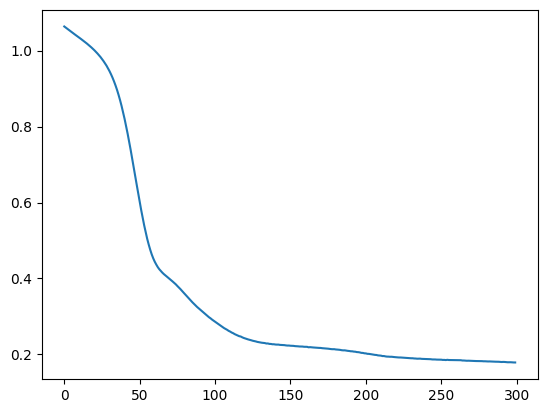

In [75]:
plt.plot((losses))

In [146]:
model.eval()

y_pred = model(X_test).detach().numpy()

In [193]:
y_pred.shape

(124, 72, 1)

In [147]:
forecast = y_pred[:,-1,:]
forecast.shape

(124, 1)

In [199]:
X_train.mean(), X_test.mean() # , X_val.mean()

(tensor(0.2001), tensor(0.2362))

In [155]:
# target = y_test[-1,:,:]
# target.shape

torch.Size([72, 1])

In [149]:
target2 = y_test[:,-1,:]

In [202]:
y_test.shape

torch.Size([124, 72, 1])

In [194]:
X_test

tensor([[[-0.1257,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.2342,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.2945,  1.0000,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.1155,  1.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0311,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.1498,  1.0000,  0.0000,  0.0000,  0.0000]],

        [[-0.2342,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.2945,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.3187,  1.0000,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0311,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.1498,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.2825,  1.0000,  0.0000,  0.0000,  0.0000]],

        [[-0.2945,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.3187,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.3187,  1.0000,  0.0000,  0.0000,  0.0000],
         ...,
         [-0.1498,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.2825,  1.0000,  0.0000,  0.0000,  0.0000],
  

In [185]:
len(forecast)

124

In [200]:
forecast

array([[-0.6202432 ],
       [-0.55995667],
       [-0.48596513],
       [-0.40567088],
       [-0.32411516],
       [-0.24464111],
       [-0.1724116 ],
       [-0.11449675],
       [-0.08081795],
       [-0.07495962],
       [-0.09925149],
       [-0.14808594],
       [-0.2117867 ],
       [-0.28292215],
       [-0.35564893],
       [-0.42567992],
       [-0.4900633 ],
       [-0.54647493],
       [-0.5941112 ],
       [-0.6324355 ],
       [-0.6584354 ],
       [-0.6691864 ],
       [-0.6624696 ],
       [-0.63826007],
       [-0.5960717 ],
       [-0.53751695],
       [-0.46597075],
       [-0.38408542],
       [-0.29318857],
       [-0.19750254],
       [-0.10567068],
       [-0.02669929],
       [ 0.02767701],
       [ 0.05436592],
       [ 0.05746081],
       [ 0.04230797],
       [ 0.00883485],
       [-0.03920023],
       [-0.09923635],
       [-0.16886328],
       [-0.24417175],
       [-0.31715488],
       [-0.3813423 ],
       [-0.43122572],
       [-0.46181983],
       [-0

In [201]:
X_test

tensor([[[-0.1257,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.2342,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.2945,  1.0000,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.1155,  1.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0311,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.1498,  1.0000,  0.0000,  0.0000,  0.0000]],

        [[-0.2342,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.2945,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.3187,  1.0000,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0311,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.1498,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.2825,  1.0000,  0.0000,  0.0000,  0.0000]],

        [[-0.2945,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.3187,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.3187,  1.0000,  0.0000,  0.0000,  0.0000],
         ...,
         [-0.1498,  1.0000,  0.0000,  0.0000,  0.0000],
         [-0.2825,  1.0000,  0.0000,  0.0000,  0.0000],
  

In [187]:
ax_x_forecast = np.arange(len(target) - len(forecast), len(target))

In [186]:
ax_x_forecast

array([-52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40,
       -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27,
       -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14,
       -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,
         0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71])

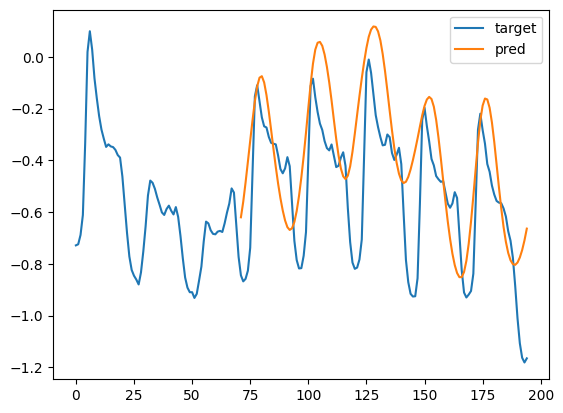

In [188]:
plt.plot(target, label="target")
plt.plot(ax_x_forecast, forecast, label='pred')
plt.legend()


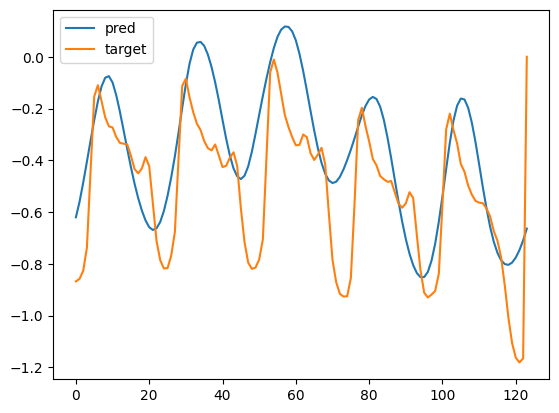

In [156]:
plt.plot(forecast, label='pred')
plt.plot(target2, label='target')
plt.legend()

In [ ]:
torch.tensor(y_test).size()

/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_22118/2497325168.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y_test).size()


torch.Size([25, 1, 1])

In [ ]:
type(y_pred)

numpy.ndarray

In [190]:
str(loss_func(torch.tensor(y_pred), y_test).detach().numpy())

'0.114071354'

In [189]:
path = f'models/LSTM-{str(datetime.now().date())}-loss-{str(loss_func(torch.tensor(y_pred), y_test).detach().numpy())}'

In [191]:
torch.save(model.state_dict(), path)

In [ ]:
model = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, seq_len=seq_dim)
model.load_state_dict(torch.load(path))
model.eval()

LSTM(
  (lstm): LSTM(5, 11, num_layers=3, batch_first=True)
  (linear): Linear(in_features=792, out_features=1, bias=True)
  (ffn): Sequential(
    (0): Linear(in_features=792, out_features=72, bias=True)
    (1): ReLU()
    (2): Linear(in_features=72, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
  )
)